In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
train_dataset=pd.read_pickle("train_dataset.pickle")
test_dataset=pd.read_pickle("test_dataset.pickle")

In [3]:
train_dataset=pd.DataFrame(train_dataset)
test_dataset=pd.DataFrame(test_dataset)
train_dataset.describe() # to check for non empty rows

,0,1
count,800.000000,800.000000
mean,0.518188,2.277763
std,0.290517,1.092539
min,0.000803,0.653895
25%,0.262765,1.347691
50%,0.529583,1.961799
75%,0.775114,3.030284
max,0.997247,4.967102


In [4]:
train_dataset=train_dataset.sample(frac=1)
train_x=train_dataset[0]
train_y=train_dataset[1]
test_x=test_dataset[0]
test_y=test_dataset[1]

In [5]:
train_x=np.array(train_x).reshape(-1,1)
train_y=np.array(train_y).reshape(-1,1)
test_x=np.array(test_x).reshape(-1,1)
test_y=np.array(test_y).reshape(-1,1)

In [6]:
bias=[]
var=[]
mse=[]
error=[]
bias_square=[]

In [7]:
for i in range (1,16):
    poly=PolynomialFeatures(i)
    temp_pred=[]
    temp_avg_pred=[]
    temp_var_arr=[]
    temp_mse=[]
    temp_error=[]
    
    for j in range(0,20):
        temp_x=train_x[40*j:40*(j+1)].reshape(-1,1)
        temp_y=train_y[40*j:40*(j+1)].reshape(-1,1)
        
        transform_x=poly.fit_transform(temp_x)
        test_transform_x=poly.fit_transform(test_x)
        model=linear_model.LinearRegression().fit(transform_x,temp_y)
        y_pred=model.predict(test_transform_x)
        
        temp_pred.append(y_pred.reshape(-1,1))
    
    for j in range(len(test_x)):
        sum=0
        mse_val=0
        val_y=[]
        for k in range(0,20):
            sum+=temp_pred[k][j][0]
            mse_val+= ((temp_pred[k][j][0]-test_y[j][0])**2)
            val_y.append(temp_pred[k][j][0])
            
        sum/=20
        mse_val/=20
        temp_mse.append(mse_val)
        val_y=np.array(val_y).reshape(-1,1)
        var_value=np.var(val_y)
        temp_var_arr.append(var_value)
        temp_avg_pred.append(sum)
    
    temp_avg_pred=np.array(temp_avg_pred).reshape(-1,1)
    temp_mse=np.array(temp_mse).reshape(-1,1)
    temp_bias_arr=np.absolute(temp_avg_pred-test_y)
    temp_bias_square_arr=temp_bias_arr**2
    temp_bias=np.mean(temp_bias_arr)
    temp_bias_square=np.mean(temp_bias_square_arr)
    temp_var=np.mean(np.array(temp_var_arr).reshape(-1,1))
    temp_err=temp_mse-(temp_bias_square_arr+temp_var_arr)
    temp_err_val=np.mean(np.array(temp_err).reshape(-1,1))
    bias.append(temp_bias)
    var.append(temp_var)
    bias_square.append(np.mean(temp_bias_square_arr))
    mse.append(np.mean(temp_mse))
    error.append(temp_err_val)

In [8]:
from tabulate import tabulate
table = {
        'Degree' : range(1,16),
        'Bias' : bias,
        'Variance': var,
        'Irreducible Error': error,
        'MSE':mse,
    'Bias Square':bias_square
     }
print(tabulate(table,headers='keys',tablefmt='psql'))

+----------+-----------+-------------+---------------------+------------+---------------+
|   Degree |      Bias |    Variance |   Irreducible Error |        MSE |   Bias Square |
|----------+-----------+-------------+---------------------+------------+---------------|
|        1 | 0.269412  | 0.00409999  |         1.00475e-17 | 0.118489   |    0.114389   |
|        2 | 0.0869953 | 0.000770021 |        -1.52656e-18 | 0.0128746  |    0.0121046  |
|        3 | 0.0333405 | 0.000400913 |        -3.73659e-18 | 0.00510506 |    0.00470415 |
|        4 | 0.0242133 | 0.000451628 |        -7.31359e-19 | 0.00469312 |    0.00424149 |
|        5 | 0.0255676 | 0.000997147 |        -8.29892e-19 | 0.00531854 |    0.00432139 |
|        6 | 0.0256403 | 0.00130932  |         2.59237e-18 | 0.00562043 |    0.00431111 |
|        7 | 0.0262583 | 0.00209981  |        -1.42109e-18 | 0.00646784 |    0.00436803 |
|        8 | 0.0263216 | 0.00225943  |        -3.27516e-19 | 0.00666098 |    0.00440155 |
|        9

In [9]:
degree_=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

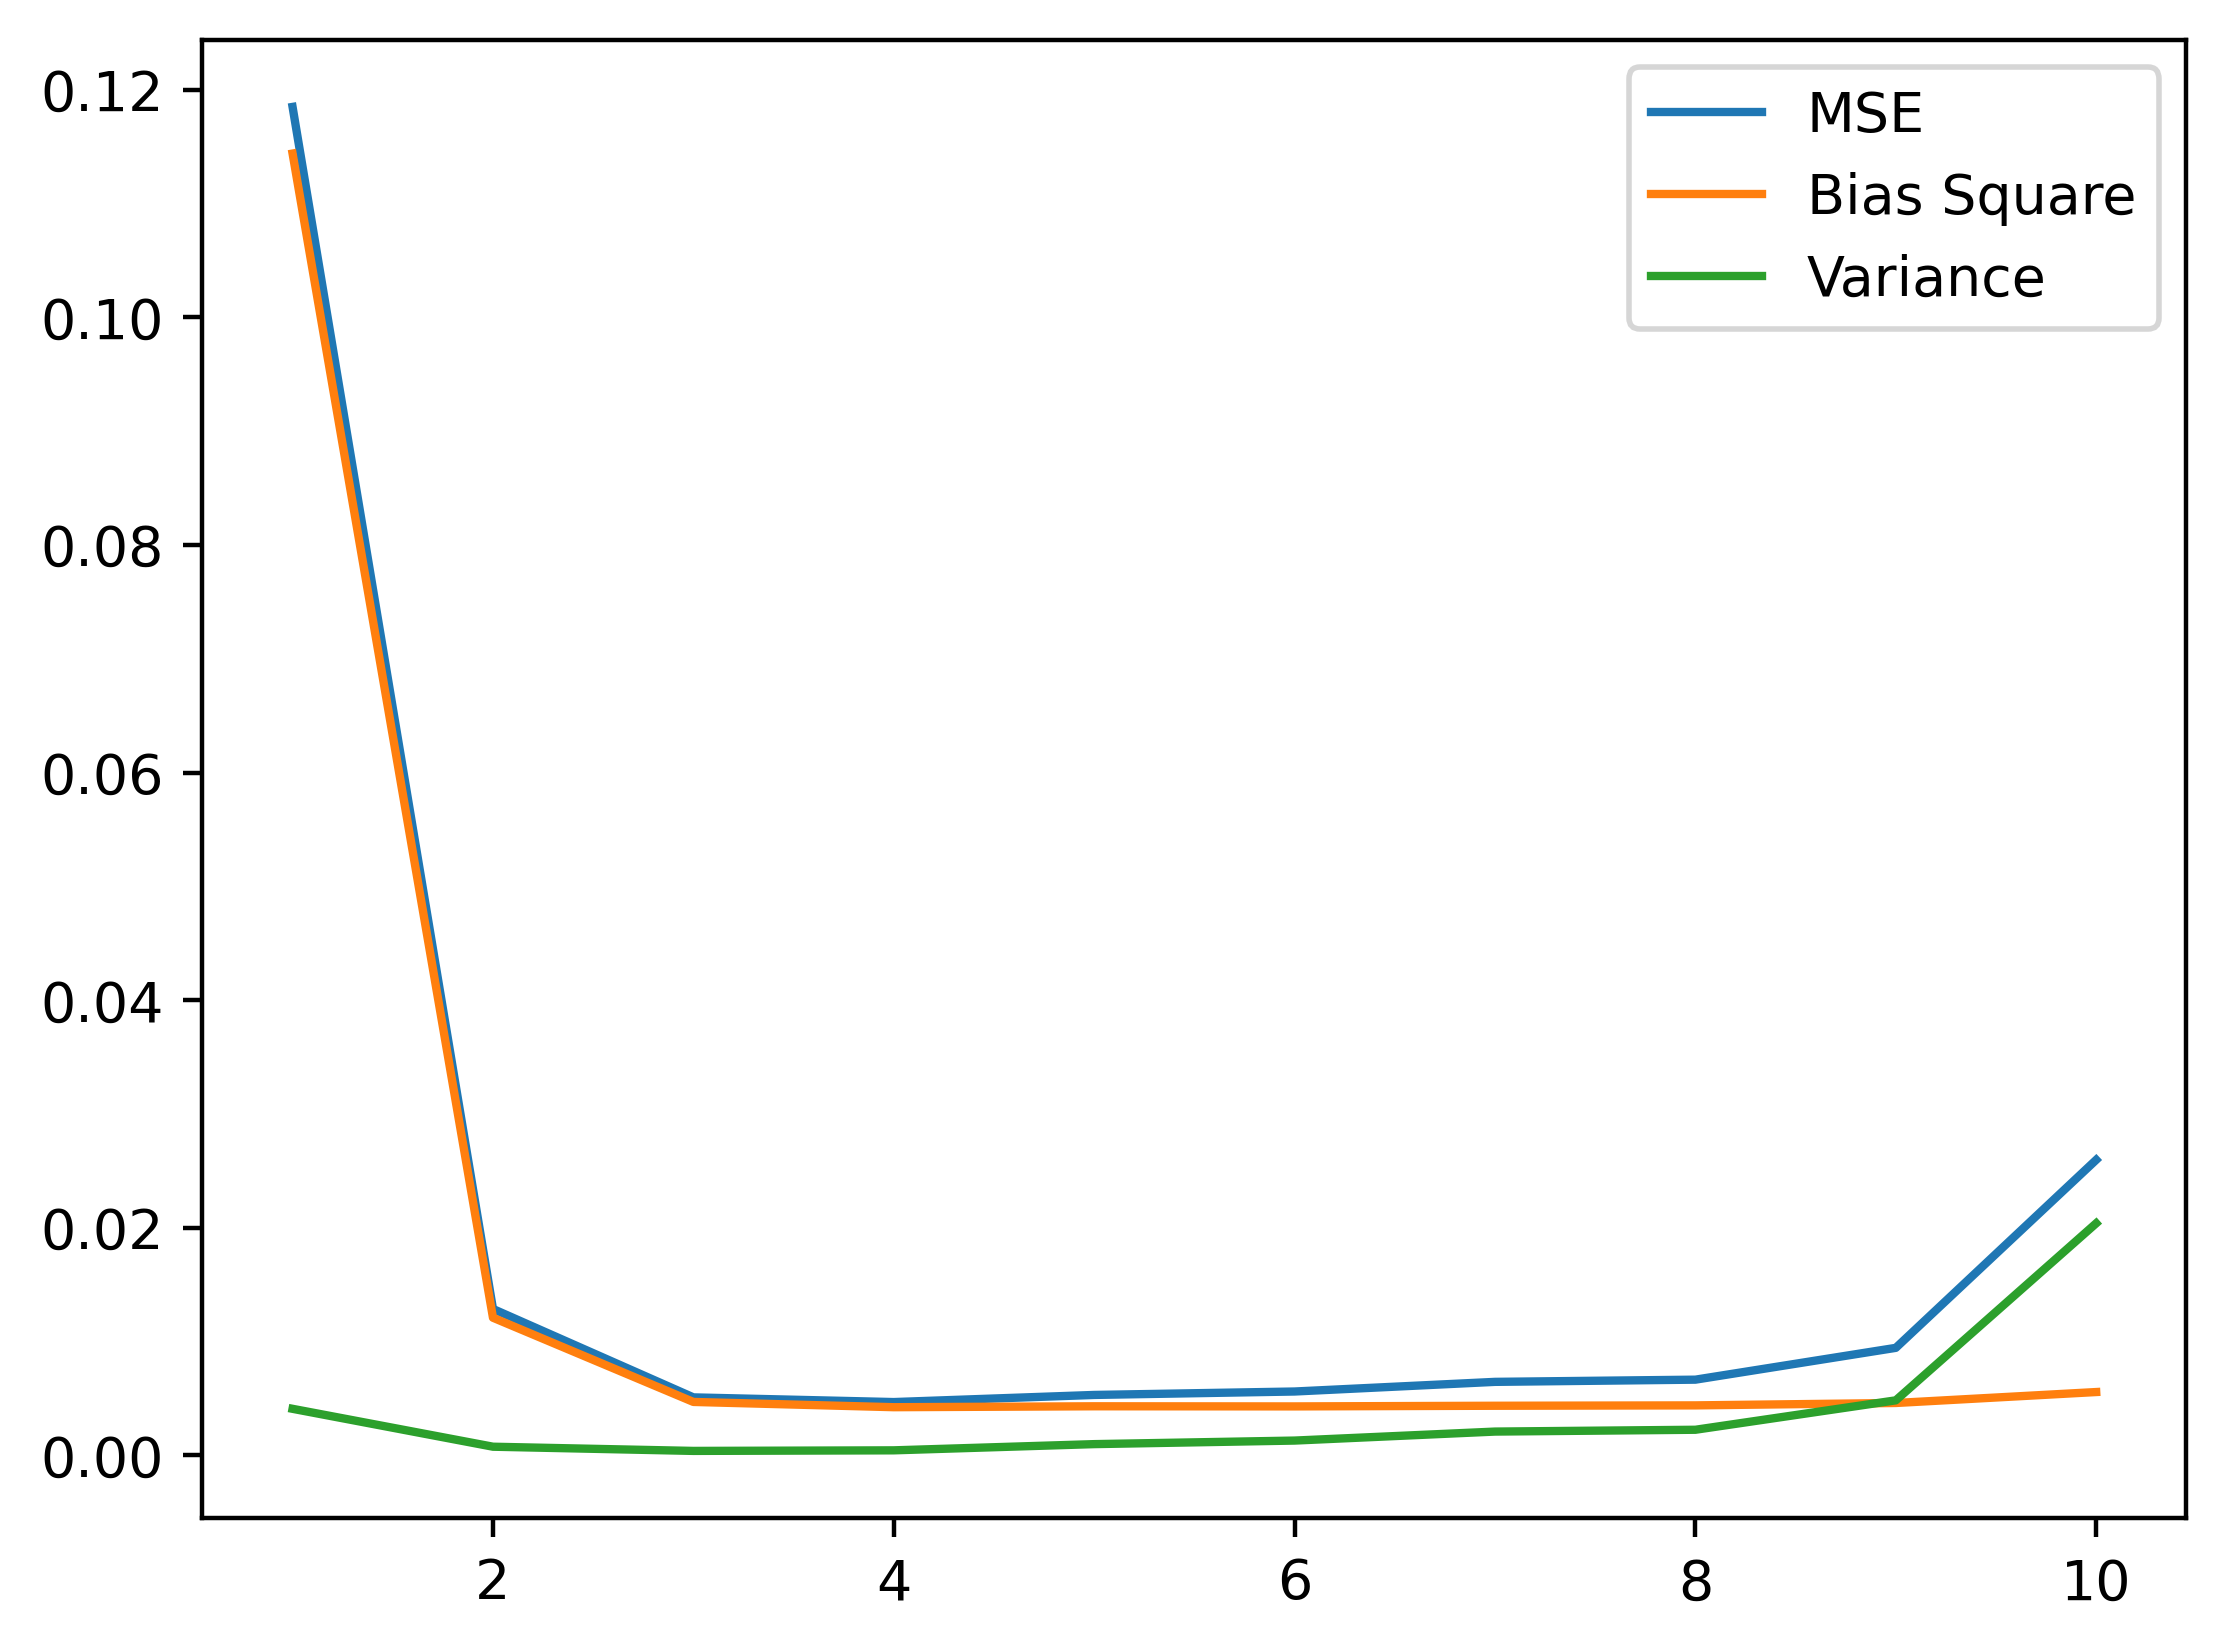

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400
plt.plot(degree_[0:10], mse[0:10], label="MSE")
plt.plot(degree_[0:10], bias_square[0:10], label="Bias Square")
plt.plot(degree_[0:10], var[0:10], label="Variance")
plt.legend()
plt.show()

In [11]:
# plt.rcParams['figure.dpi'] = 400
# plt.plot(degree_[0:10], bias[0:10], label="Bias")
# plt.plot(degree_[0:10], var[0:10], label="Variance")
# plt.legend()
# plt.show()